In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

df=pd.read_csv('data_science_salaries.csv')
df


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
3298,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


In [17]:
grouped = df.groupby('Job Title')[['Salary in USD']].count()
grouped.sort_values('Salary in USD', ascending=False, inplace=True)
popular_titles = grouped[grouped['Salary in USD'] > 80].index

df = df[df['Job Title'].isin(popular_titles)]
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3289,Machine Learning Engineer,Full-Time,Senior,Expert,40000,Euro,Croatia,45618,Croatia,Small,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [18]:
grouped[grouped['Salary in USD'] > 80]

,Salary in USD
Job Title,
Data Engineer,702
Data Scientist,635
Data Analyst,459
Machine Learning Engineer,300
Analytics Engineer,132
Research Scientist,104
Data Architect,84


In [19]:
numerical = df.select_dtypes(include=np.number)
numerical.drop('Salary', axis=1, inplace=True)
categorical = df.select_dtypes(include=object)

ord_encoded = categorical[['Experience Level','Company Size']]
ord_encoded = ord_encoded.replace({
    'Experience Level': {'Executive': 4, 'Senior': 3, 'Mid': 2, 'Entry': 1},
    'Company Size': {'Small': 1, 'Large': 3, 'Medium': 2},
})

hot_encoded = categorical[['Employment Type','Job Title']]
hot_encoded = pd.get_dummies(hot_encoded, dtype=int)

cat_encoded = pd.concat([ord_encoded,hot_encoded], axis=1)
all_data = pd.concat([numerical, cat_encoded], axis=1)
all_data

,Salary in USD,Year,Experience Level,Company Size,Employment Type_Contract,Employment Type_Freelance,Employment Type_Full-Time,Employment Type_Part-Time,Job Title_Analytics Engineer,Job Title_Data Analyst,Job Title_Data Architect,Job Title_Data Engineer,Job Title_Data Scientist,Job Title_Machine Learning Engineer,Job Title_Research Scientist
0,210000,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
1,165000,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
2,185900,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
3,129300,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
4,140000,2023,3,2,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,45618,2020,3,1,0,0,1,0,0,0,0,0,0,1,0
3291,119059,2021,2,2,0,0,1,0,0,0,0,0,1,0,0
3293,28369,2021,2,3,0,0,1,0,0,0,0,1,0,0,0
3295,412000,2020,3,3,0,0,1,0,0,0,0,0,1,0,0


In [20]:
X = all_data.drop('Salary in USD', axis=1)
y = all_data['Salary in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))

lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)

,y_test,y_pred,residual
535,167850,166084.893034,1765.106966
263,110000,131396.893034,-21396.893034
2275,75000,107876.893034,-32876.893034
2614,113000,116420.893034,-3420.893034
1401,139000,131396.893034,7603.106966
...,...,...,...
1945,122700,166084.893034,-43384.893034
1999,100706,160244.893034,-59538.893034
363,222000,166084.893034,55915.106966
2440,57872,113700.893034,-55828.893034


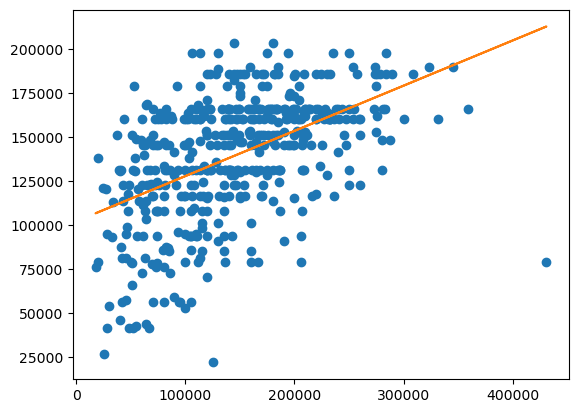

In [21]:
X = all_data.drop('Salary in USD', axis=1)
y = all_data['Salary in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))

lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

res_df

In [22]:
# Model Validation

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2


MSE: 3429405950.9962854
RMSE: 58561.13003517167
MAE: 45712.01652935714
R2: 0.23528603808766124
Adj_R2: 0.21245875564251682
R2_train: 0.2880410695727649
R2_test: 0.23528603808766124


In [23]:
# Check performance on X_train_scaled (check for underfitting)
y_train_pred = model.predict(X_train_scaled)
train_residuals = np.array(y_train - y_train_pred)
res_df = pd.DataFrame({'y_test':y_train, 'y_pred':y_train_pred, 'residual':train_residuals})
res_df

,y_test,y_pred,residual
2271,185900,151108.893034,34791.106966
2144,35610,110196.893034,-74586.893034
715,80000,131396.893034,-51396.893034
1386,199000,166084.893034,32915.106966
1084,281000,166084.893034,114915.106966
...,...,...,...
2237,120000,113700.893034,6299.106966
1476,151800,152739.504946,-939.504946
1521,154000,94020.893034,59979.106966
1751,370000,166084.893034,203915.106966


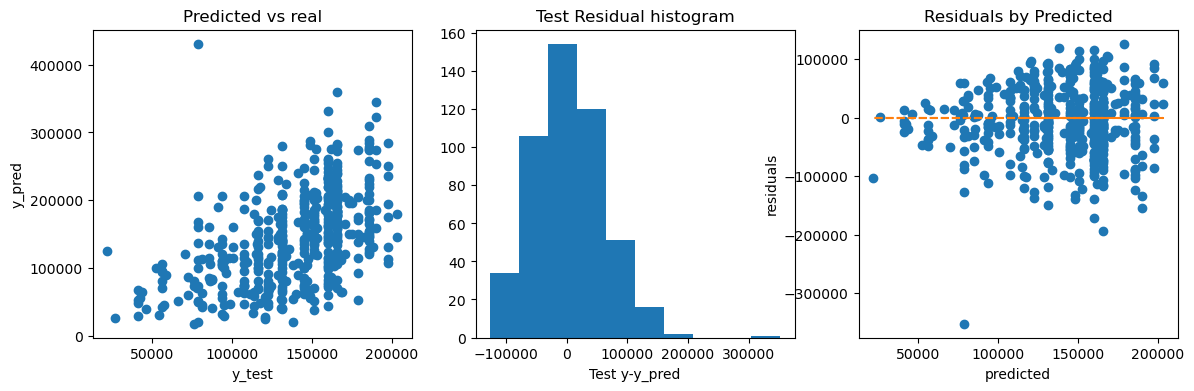

In [24]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

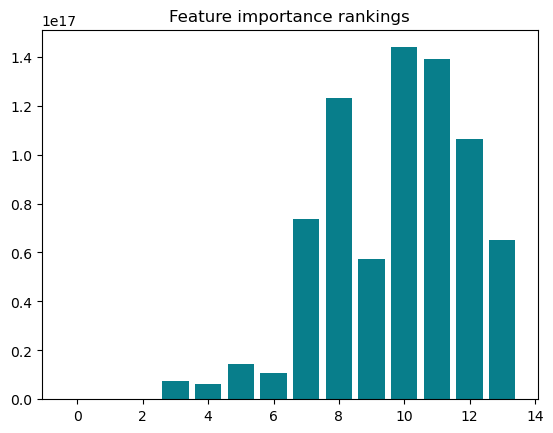

,Variable,Importance,name
10,10,1.438742e+17,Job Title_Data Architect
11,11,1.392487e+17,Job Title_Data Engineer
8,8,1.233455e+17,Job Title_Analytics Engineer
12,12,1.062560e+17,Job Title_Data Scientist
7,7,7.348224e+16,Employment Type_Part-Time
13,13,6.503614e+16,Job Title_Machine Learning Engineer
9,9,5.717954e+16,Job Title_Data Analyst
5,5,1.436962e+16,Employment Type_Freelance
6,6,1.062647e+16,Employment Type_Full-Time
3,3,7.519900e+15,Company Size


In [25]:
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    #'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
    'Importance': model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),)
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=feature_importances['Variable'].iloc[:], height=feature_importances['Importance'].iloc[:], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='horizontal')
plt.show()

important_features = feature_importances.sort_values('Importance', ascending=False).head(15)
features = all_data.columns
important_features['name'] = features[important_features['Variable']]
important_features

MSE: 2882360386.4761024
RMSE: 53687.61855843582
MAE: 41735.35529028565
R2: 0.3106178770934723
Adj_R2: 0.2865496733012245
R2_train: 0.3048103821847994
R2_test: 0.3106178770934723


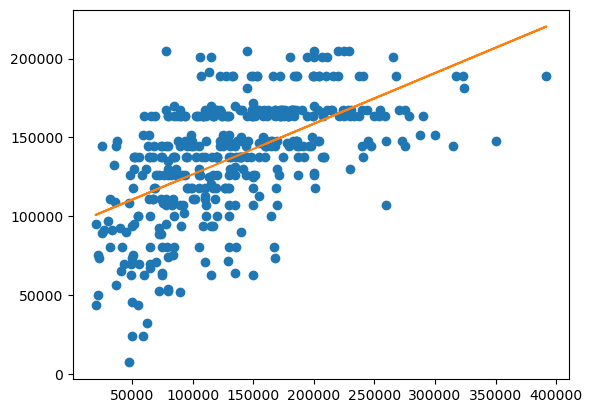

In [26]:
"""
=======================================================================================
|                                                                                     |
|  Rerun the model after removing the outliers and compare the results using the R2.  |
|                                                                                     |
=======================================================================================

"""

from scipy import stats

without_outliers = all_data[(np.abs(stats.zscore(all_data)) < 4).all(axis=1)]

X = without_outliers.drop('Salary in USD', axis=1)
y = without_outliers['Salary in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2

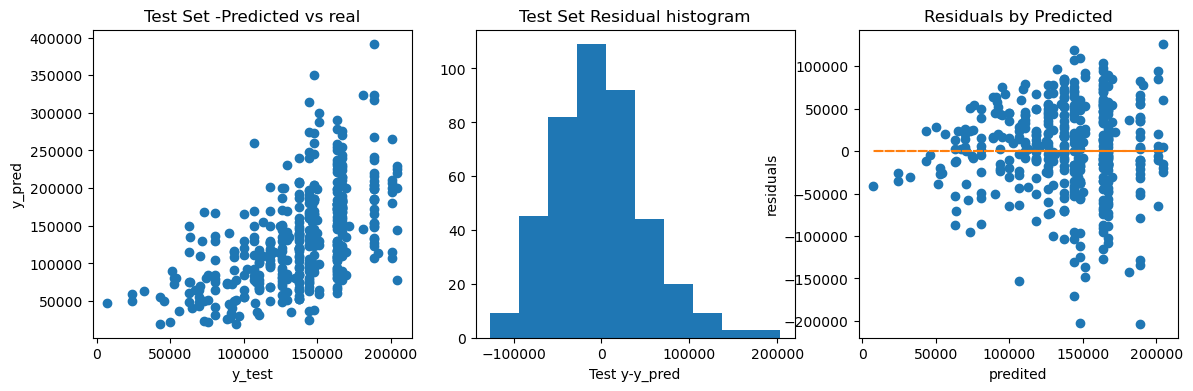

In [27]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

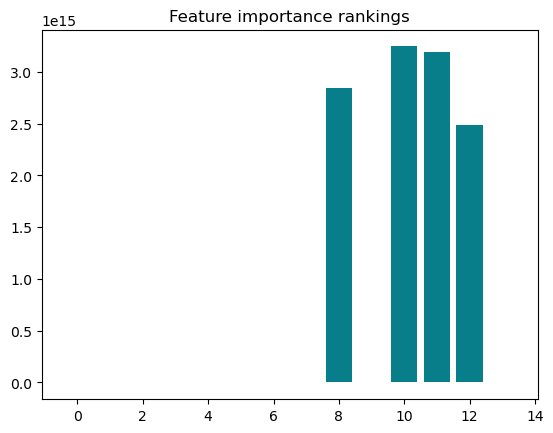

,Variable,Importance,name
10,10,3.246396e+15,Job Title_Data Architect
11,11,3.188713e+15,Job Title_Data Engineer
8,8,2.848253e+15,Job Title_Analytics Engineer
12,12,2.486351e+15,Job Title_Data Scientist
5,5,1.178677e+12,Employment Type_Freelance
1,1,2.546156e+04,Year
0,0,1.336185e+04,Salary in USD
2,2,8.685720e+02,Experience Level
6,6,0.000000e+00,Employment Type_Full-Time
7,7,0.000000e+00,Employment Type_Part-Time


In [28]:
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    #'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
    'Importance': model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),)
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=feature_importances['Variable'].iloc[:], height=feature_importances['Importance'].iloc[:], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='horizontal')
plt.show()

important_features = feature_importances.sort_values('Importance', ascending=False).head(15)
features = all_data.columns
important_features['name'] = features[important_features['Variable']]
important_features

In [29]:
model.coef_

array([ 1.33618537e+04,  2.54615612e+04,  8.68572021e+02, -1.82851781e+11,
       -5.61543109e+10,  1.17867674e+12,  0.00000000e+00,  0.00000000e+00,
        2.84825300e+15,  0.00000000e+00,  3.24639581e+15,  3.18871270e+15,
        2.48635055e+15,  0.00000000e+00])